In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random, pylab
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from scipy import integrate
from scipy import optimize

# Monte Carlo Simulation

#### By Kaloyan Zlatkov

## Abstract
In this work some definitions of the Monte Carlo Simulation was given as well a brief overview of the benefits of simulating in various areas of the human list of activities. After that 4 simple functions were investigated (one with 2 degrees of freedom) and integrated using analytical approach, classical trapezoidal rule numerical integration and the proposed Monte Carlo Integration. The Monte Carlo approach is much slower and not so accurate in compare with the classical trapezoidal rule but for solvable and rather simple functions with 1 up to 2 dimensions. The true power of the Monte Carlo Integration was not demonstrated (for integrating of functions with more degrees of freedom). In the end a Monte Carlo Simulation was used to analyse some Texas Hold'em poker situations and improve decision making processes.

## 1) Simulation definition

A simulation is is a fictitious representation of reality. A simulation is an approximate imitation of the operation of a process or system. In terms of computer simulation, it is an attempt to model a real-life or hypothetical situation on a computer so that it can be studied to see how the system works. By changing variables in the simulation, predictions may be made about the behaviour of the system. It is a tool to virtually investigate the behaviour of the system under study.

![Alt text](https://cdn0.tnwcdn.com/wp-content/blogs.dir/1/files/2012/05/246005_1980289318379_1980263277728_41611_794_b.jpg)

### 1.1) Use of simulation in science?

Usually the simulation is used by creating a virtual model or smaller/cheaper replica of the studied scientific phenomena or object of interest. The closer the simulation parameters are to the real object of investigation, the more reliable the simulation will be. The simulation can be very complex or quite simple. 

For example drawing one pseudo-random uniform variable from the interval [0,1] can be used to simulate the tossing of a coin: If the value is less than or equal to 0.50 designate the outcome as heads, but if the value is greater than 0.50 designate the outcome as tails. The author's favourite tossing coin simulation is running his phone's chronometer. When he press the stop button (without looking at the numbers of the chronometer) he observes the figure of hundreds (milliseconds). If the number is even, the result of the simulation is heads (for example) and if it's odd - the result is tail. The simulation should yield close to fair 50/50 percent chance for either even or odd result. As does the tossing of fair coin.

### 1.2) Simulation usefulness?

In every scientific aspect of the human civilization there is place for simulation, especially if the real tests are too slow, too expensive or virtually impossible. Issues such as cost, safety, scope, time and scale can be overcome by the use of a scientific simulation. One of the primary advantages of simulators is that they are able to provide users with practical feedback when designing real world systems. This allows the designer to determine the correctness and efficiency of a design before the system is actually constructed. Consequently, the user may explore the merits of alternative designs without actually physically building the systems. By investigating the effects of specific design decisions during the design phase rather than the construction phase, the overall cost of building the system diminishes significantly.

Another benefit of simulators is that they permit system designers to study a problem at several different levels of abstraction. By approaching a system at a higher level of abstraction, the designer is better able to understand the behaviours and interactions of all the high level components within the system and is therefore better equipped to counteract the complexity of the overall system. This complexity may simply overwhelm the designer if the problem had been approached from a lower level. As the designer better understands the operation of the higher level components through the use of the simulator, the lower level components may then be designed and subsequently simulated for verification and performance evaluation.

Also, simulators can be used as an effective means for teaching or demonstrating concepts to students. This is particularly true of simulators that make intelligent use of computer graphics and animation. Such simulators dynamically show the behaviour and relationship of all the simulated system's components, thereby providing the user with a meaningful understanding of the system's nature. 

## 2) Stochastic simulation and statistics.

The best use of statistics is in complex systems that cannot be analysed by any other mean (like classical analytical approach for example). Also when there are too many degrees of freedom or too many dimensions the brute force are way to slow and the classical analytical methods are virtually impossible.

The etymology of the word **"Stochastic"** originally meant "pertaining to conjecture"; from Greek stokhastikos "able to guess, conjecturing": from stokhazesthai "guess"; from stokhos "a guess, aim, target, mark". So whenever one may want to **"guess"** what will be the outcome of some complex system that is impossible to calculate otherwise he/she may do that with a Stochastic Simulation. 

A stochastic simulation is a simulation that traces the evolution of variables that can change stochastically (randomly) with certain probabilities. With a stochastic model we create a projection which is based on a set of random values. Outputs are recorded and the projection is repeated with a new set of random values of the variables. These steps are repeated until a sufficient amount of data is gathered. In the end, the distribution of the outputs shows the most probable estimates as well as a frame of expectations regarding what ranges of values the variables are more or less likely to fall in.

## 3) Monte Carlo simulation (also known as "Monte Carlo method")

There are different definitions of the Monte Carlo method (for some it is different than Monte Carlo Simulation). Even though there are earlier work on the same ideas, the modern version of the Monte Carlo method was invented in the late 1940s by Stanislaw Ulam, while he was working on nuclear weapons projects at the Los Alamos National Laboratory. Because of the secrecy of the project from one hand and the statistical gambler flavour of the examples from the other, the whole method was named after the casino-rich city state of Monte Carlo. 

Monte Carlo is an estimation procedure. The main idea is that if it is necessary to know the average value of some random variable and its distribution cannot be stated, and if it is possible to take samples from the distribution, we can estimate it by taking the samples, independently, and averaging them. If there are sufficient samples, then the law of large numbers says the average must be close to the true value. The central limit theorem says that the average has a Gaussian distribution around the true value. Regarding the difference between Monte Carlo Method and Monte Carlo Simulation according to some authors: a Monte Carlo method is a technique that can be used to solve a mathematical or statistical problem, and a Monte Carlo simulation uses repeated sampling to obtain the statistical properties of some phenomenon (or behaviour). As a popular example of their difference:
* Monte Carlo Method: Pouring out a box of coins on a table, and then computing the ratio of coins that land heads versus tails is a Monte Carlo method of determining the behaviour  of repeated coin tosses, but it is not a simulation.
* Monte Carlo simulation: Drawing a large number of pseudo-random uniform variables from the interval [0,1] at one time, or once at a large number of different times, and assigning values less than or equal to 0.50 as heads and greater than 0.50 as tails, is a Monte Carlo simulation of the behaviour  of repeatedly tossing a coin.

There is a huge number of applications in almost all fields of human activities: 
* Physics (including computational physics, physical chemistry, quantum chromodynamics, aerodynamics, statistical physics, molecular dynamics, statistical field theories, radiation materials science, particle physics, astrophysics, weather forecasting, etc.);
* Engineering (sensitivity analysis and quantitative probabilistic analysis in process design in areas like microelectronics engineering, geostatistics and  geometallurgy, wind energy, combustion energetics, fluid dynamics, autonomous robotics, telecommunications, reliability engineering, signal processing, etc.)
* Climate change and radiative forcing
* Computational biology
* Computer graphics (path tracing, rendering)
* Applied statistics
* AI for games
* Design and visuals (in VR, 3D games and cinematic special effects, etc.)
* Search and rescue
* Finance and business (actually there is huge amount of Monte Carlo methods in finance usage for various financial derivatives. Maybe the financial use is one of the most famous)
* Law
* And of course in mathematics - in deterministic numerical integration, simulations and optimizations and solving inverse problems

## 4) Monte Carlo Simulation in numeric integration

The problem with the integration is that it is very hard or often impossible to perform with classical pen and white paper, following the analytical approach. Fortunately there are very fast and accurate methods using digital sampling and integration, like the trapezoidal rule for example. But these methods also have their limitations as the function might not be arbitrary and the calculations become too slow for more dimensions or degrees of freedom. So here comes the Monte Carlo Simulation which can calculate arbitrarily complex function for arbitrarily large degree of freedom reasonably fast. For example a Monte Carlo Simulations were used to calculate the [Batman Sigil Equation](http://www.sawp.com.br/blog/?p=2076) or even integrating the [Batman Sigil](https://vodeocatalog.com/en/video/AyBNnkYrSWY).

The scope of this project is to demonstrate the Monte Carlo Simulation which will be used as a numeric integration of four functions. The goal will be to compare it with analytical solution and trapezoidal numeric integration method. Here are the four integrals of our study:

`(1)`$$ \int_{1}^{2} (2x)dx $$
`(2)`$$ \int_{4}^{9} \frac{1}{\sqrt{x}}dx $$
`(3)`$$ \int_{0}^{\pi/2} sin^{2}(x)dx $$
`(4)`$$ \int_{0}^{1}\int_{0}^{1} (x + y)dxdy $$

### 4.1) Analytical solutions:
#### Solution of `(1)`:

`(5)`$$ \int_{1}^{2} (2x)dx = x^2 + C \biggr \rvert  from (x = 1) to (x = 2) = $$
$$ = (2^2 + C) - (1^2 + C) = 4 - 1 = 3$$

#### Solution of `(2)`:

`(6)`$$ \int_{4}^{9} \frac{1}{\sqrt{x}}dx = 2 \sqrt{x} \biggr \rvert from (x = 4) to (x = 9) = $$
$$ = 2.3 - 2.2 = 6 - 4 = 2 $$

#### Solution of `(3)`:

`(7)` $$ I = \int_{0}^{\pi/2} sin^{2}(x)dx = \int_{0}^{\pi}\biggr (\frac{1}{2} - \frac{cos{2x}}{2} \biggr)dx $$
`(8)` lets $$ u = 2x => du = 2dx => dx = \frac{du}{2} $$
`(9)` from `(7)` and `(8)` => $$ I = \frac{1}{4} \int_{0}^{\pi / 4} (1 - cos(u))du = \frac{1}{4} \biggr(u - sin(u)\biggr) + C = $$
$$ = \frac{1}{4} \biggr(2x - sin(2x)\biggr) + C = \frac{1}{4} \biggr(2x - 2sin(x)cos(x)\biggr) + C = $$
$$ = \frac{1}{2} \biggr(x - sin(x)cos(x)\biggr) \biggr \rvert from (x = 0) to \biggr(x = \frac{\pi}{2}\biggr) = $$
$$ = \frac{1}{2} \biggr(\frac{\pi}{2} - sin\frac{\pi}{2} cos\frac{\pi}{2} \biggr) + C - \frac{1}{2} \biggr(0 - sin(0)cos(0) \biggr) - C = \frac{\pi}{4} = 0.78539816339744830961566084581988 $$

#### Solution of `(4)`:

`(10)` $$ \int_{0}^{1}\int_{0}^{1} (x + y)dxdy = \int_{0}^{1} \biggr(\frac{x^2}{2} + xy + C_1 \biggr)dy \biggr \rvert from (x = 0) to (x = 1) = $$
$$ = \frac{x^2y}{2} + \frac{xy^2}{2} + C_1y + C_2 \biggr \rvert from (x = 0) to (x = 1) and (y = 0) to (y = 1) = $$
$$ \frac{y}{2} + \frac{y^2}{2} + C_1y + C_2 - C_1y - C_2 \biggr \rvert from (y = 0) to (y = 1) = \frac{1}{2} + \frac{1}{2} - 0 = \frac{1}{4} = 0.25 $$

##### Summary: The analytical solution took few hours. It is 100% accurate but for analytically solvable integrals.

### 4.2) Plotting the 4 functions:

In [3]:
def plot_function(f, min_x, max_x, num_points, x_zero, y_zero, integral_min, integral_max, string_function, zero):
    """
    Plots the function f, between the x values of min_x and max_x, using plotting number of points num_points
    """
    x = np.linspace(min_x, max_x, num_points)
    f_vectorized = np.vectorize(f)
    y = f_vectorized(x)
    plt.plot(x, y)
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # drawing lines between the x values between which the integration will be done
    plt.axvline(x=integral_min, C = "orange")
    plt.axvline(x=integral_max, C = "orange")

    # filling the area that will be integrated
    ax.fill_between(x, y, where = (x >= integral_min) & (x <= integral_max), facecolor='green', alpha = 0.3)

    #zero fixing
    if zero:
        xticks = ax.xaxis.get_major_ticks()
        yticks = ax.yaxis.get_major_ticks()
        xticks[x_zero].label1.set_visible(False)
        yticks[y_zero].label1.set_visible(False)    
        plt.text(-0.4, -1, "0")
    
    plt.title(f"Integration of f(x) = {string_function}, for x between {integral_min} and {integral_max}")
    plt.show()

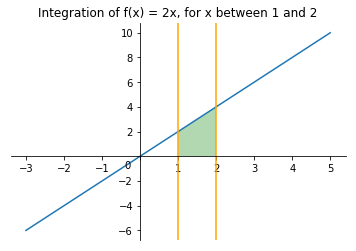

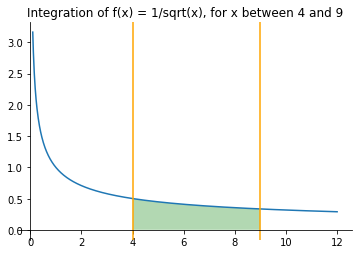

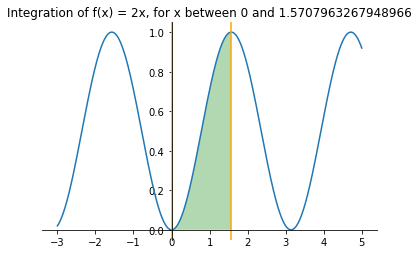

In [4]:
plot_function(lambda x: 2 * x, -3, 5, 1000, 4, 4, 1, 2, "2x", True)
plot_function(lambda x: 1 / math.sqrt(x), 0.1, 12, 1000, 4, 4, 4, 9, "1/sqrt(x)", False)
plot_function(lambda x: math.sin(x) ** 2, -3, 5, 1000, 4, 4, 0, math.pi / 2, "2x", False)

In [5]:
def plot_2D_function(z_func):
    """
    Plots z_func, copied from https://dzone.com/articles/how-plot-function-two
    """
    x = arange(-3.0,3.0,0.1)
    y = arange(-3.0,3.0,0.1)
    
    X,Y = meshgrid(x, y) # grid of point
    Z = z_func(X, Y) # evaluation of the function on the grid
    
    im = imshow(Z,cmap=cm.RdBu) # drawing the function
    # adding the Contour lines with labels
    cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
    clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    colorbar(im) # adding the colobar on the right
    # latex fashion title
    title('x + y')
    show()

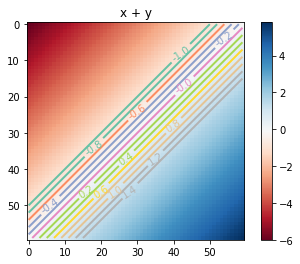

In [6]:
plot_2D_function(lambda x, y: x + y)

### 4.3) Solutions following Trapezoidal rule:
Тhe trapezoidal rule (also known as the trapezoid rule or trapezium rule) is a technique for approximating the definite integral.

In [7]:
def trapezoidal(f, a, b, n):
    """
    Calculates the definite integral of the function f, between x = a and x = b, using the trapezoidal rule principle,
    making n number of trapeze, following this guide: https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/
    """
    x = np.linspace(a, b, n + 1)
    y = f(x)
    y_right = y[1:] # Right endpoints
    y_left = y[:-1] # Left endpoints
    dx = (b - a)/n
    T = (dx/2) * np.sum(y_right + y_left)
    return T

In [8]:
def get_double_integral_from_scipy_lib(f, x1, x2, y1, y2):
    """
    Calculates the definite double integral of the function f, between x1 and x2 for the first variable x, and between
    y1 and y2 for the second variable y, using the library integrate.dblquad
    """
    return integrate.dblquad(f, x1, x2, lambda x: y1, lambda x: y2)

In [9]:
first = trapezoidal(lambda x : 2 * x, 1, 2, 1000)
diff = abs(first - 3)
print(f"The first integral from (5) is equal to 3. By Trapezoidal rule it is = {first}; Difference: {diff}")

second = trapezoidal(lambda x : 1 / np.sqrt(x), 4, 9, 1000)
diff = abs(second - 2)
print(f"The second integral from (6) is equal to 2. By Trapezoidal rule it is = {second}; Difference: {diff}")

third = trapezoidal(lambda x : np.sin(x) ** 2, 0, np.pi / 2, 1000)
diff = abs(third - (np.pi / 4))
print(f"The third integral from (9) is equal to 0.78539816339744830961566084581988 (pi/4). By Trapezoidal rule it is = {third}; Difference: {diff}")

fourth = get_double_integral_from_scipy_lib(lambda y, x: x + y, 0, 1, 0, 1)
diff = abs(fourth[1])
print(f"The fourth integral from (10) is equal to 1. By the build in function from the scipy library it is = {fourth[0]}; Difference: {diff}")

The first integral from (5) is equal to 3. By Trapezoidal rule it is = 3.0; Difference: 0.0
The second integral from (6) is equal to 2. By Trapezoidal rule it is = 2.0000000916280745; Difference: 9.162807446116972e-08
The third integral from (9) is equal to 0.78539816339744830961566084581988 (pi/4). By Trapezoidal rule it is = 0.7853981633974483; Difference: 0.0
The fourth integral from (10) is equal to 1. By the build in function from the scipy library it is = 1.0; Difference: 1.662923778137264e-14


### 4.4) Solutions following Monte Carlo Simulation:
In numerical integration, methods such as the trapezoidal rule use a deterministic approach. Monte Carlo integration, on the other hand, employs a non-deterministic approach: each realization provides a different outcome. In Monte Carlo, the final outcome is an approximation of the correct value with respective error bars, and the correct value is likely to be within those error bars.

The problem Monte Carlo integration addresses is the computation of a multidimensional definite integral. This study will only go through the surface of this topic. In order to get higher precision the number of samples should increase so much that the time for integrating even a simple function is seconds in compare to milliseconds for trapezoidal rule for low-dimensional functions. For that reason the time for calculations were not included.

The naive Monte Carlo integration approach states that if the integral I:

`(11)`$$ I = \int_{\Omega}f(\bar{x})d\bar{x} $$

where Omega, a subset of the real n-dimentioned space, has volume:

`(12)` $$ V = \int_{\Omega}d\bar{x} $$

Sampling points uniformly on Omega, given N uniform samples, I can be approximated by:

`(13)` $$ I \approx V \frac{1}{N} \sum_{i=1}^{N}f(\bar{x_i}) $$

And after some mathematical estimations of the error, the standard error of the mean is calculated as:

`(14)` $$ \frac{1}{\sqrt{N}} $$

In [10]:
def monte_carlo(f, a, b, maxX, n):
    """
    Calculates the definite integral of the function f, between the limits a and b, having in mind the point maxX at which
    the function f(maxX) has a maximum (precalculated), taking n samples of random variables
    """
    # counter of random points inside the integrated area
    inside = 0
    # point at which the funciton f(maxX) has maximum
    maxY = f(maxX)
    # calculation of the volume V, used in the Monte Carlo integration - the volume (area in this case)
    # where the random samples are generated
    V = b * maxY
    for i in range(0, n):
        randX = np.random.random() * b
        randY = np.random.random() * maxY
        if ((a <= randX <= b) and (randY <= f(randX))):
            inside += 1
    result = V * (inside / n)
    return result

In [11]:
def calc_error(N):
    return 1 / math.sqrt(N)

In [12]:
def print_result(f, a, b, expected, maxX, n):
    result = monte_carlo(f, a, b, maxX, n)
    result_error = calc_error(n)
    print(f"Expected: {expected}, calculated with {n} iterations: {result} with error {result_error}")

##### The Monte Carlo Integration of the first function (1):

In [13]:
print_result(lambda x: 2 * x, 1, 2, 3, 2, 100)
print_result(lambda x: 2 * x, 1, 2, 3, 2, 1000)
print_result(lambda x: 2 * x, 1, 2, 3, 2, 10000)
print_result(lambda x: 2 * x, 1, 2, 3, 2, 100000)
print_result(lambda x: 2 * x, 1, 2, 3, 2, 1000000)

Expected: 3, calculated with 100 iterations: 3.12 with error 0.1
Expected: 3, calculated with 1000 iterations: 2.944 with error 0.03162277660168379
Expected: 3, calculated with 10000 iterations: 2.9872 with error 0.01
Expected: 3, calculated with 100000 iterations: 3.00304 with error 0.003162277660168379
Expected: 3, calculated with 1000000 iterations: 2.994792 with error 0.001


##### The Monte Carlo Integration of the second function (2):

In [14]:
print_result(lambda x: 1 / np.sqrt(x), 4, 9, 2, 4, 100)
print_result(lambda x: 1 / np.sqrt(x), 4, 9, 2, 4, 1000)
print_result(lambda x: 1 / np.sqrt(x), 4, 9, 2, 4, 10000)
print_result(lambda x: 1 / np.sqrt(x), 4, 9, 2, 4, 100000)
print_result(lambda x: 1 / np.sqrt(x), 4, 9, 2, 4, 1000000)

Expected: 2, calculated with 100 iterations: 1.8 with error 0.1
Expected: 2, calculated with 1000 iterations: 1.9215 with error 0.03162277660168379
Expected: 2, calculated with 10000 iterations: 2.0151 with error 0.01
Expected: 2, calculated with 100000 iterations: 1.994445 with error 0.003162277660168379
Expected: 2, calculated with 1000000 iterations: 2.0014965 with error 0.001


##### The Monte Carlo Integration of the third function (3):

In [15]:
print_result(lambda x: np.sin(x) ** 2, 0, np.pi / 2, np.pi / 4, np.pi / 2, 100)
print_result(lambda x: np.sin(x) ** 2, 0, np.pi / 2, np.pi / 4, np.pi / 2, 1000)
print_result(lambda x: np.sin(x) ** 2, 0, np.pi / 2, np.pi / 4, np.pi / 2, 10000)
print_result(lambda x: np.sin(x) ** 2, 0, np.pi / 2, np.pi / 4, np.pi / 2, 100000)
print_result(lambda x: np.sin(x) ** 2, 0, np.pi / 2, np.pi / 4, np.pi / 2, 1000000)

Expected: 0.7853981633974483, calculated with 100 iterations: 0.8011061266653973 with error 0.1
Expected: 0.7853981633974483, calculated with 1000 iterations: 0.7995353303386024 with error 0.03162277660168379
Expected: 0.7853981633974483, calculated with 10000 iterations: 0.7866548004588843 with error 0.01
Expected: 0.7853981633974483, calculated with 100000 iterations: 0.7812355531314418 with error 0.003162277660168379
Expected: 0.7853981633974483, calculated with 1000000 iterations: 0.7864537385290544 with error 0.001


##### The Monte Carlo Integration of the fourth function (4):

In [16]:
def print_result_2D(x1, x2, y1, y2, expected, maxX, maxY, n):
    """
    Separate calculation of the function with 2 variables, first using monte_carlo for the first, then for the second variable.
    The sum of the two results yields the total double definite integral.
    """
    xDimention = monte_carlo(lambda x: x, x1, x2, maxX, n)
    yDimention = monte_carlo(lambda y: y, y1, y2, maxX, n)
    result = xDimention + yDimention
    result_error = calc_error(n)
    print(f"Expected: {expected}, calculated with {n} iterations: {result} with error {result_error}")

In [17]:
print_result_2D(0, 1, 0, 1, 1, 1, 1, 100)
print_result_2D(0, 1, 0, 1, 1, 1, 1, 1000)
print_result_2D(0, 1, 0, 1, 1, 1, 1, 10000)
print_result_2D(0, 1, 0, 1, 1, 1, 1, 100000)
print_result_2D(0, 1, 0, 1, 1, 1, 1, 1000000)

Expected: 1, calculated with 100 iterations: 1.01 with error 0.1
Expected: 1, calculated with 1000 iterations: 1.068 with error 0.03162277660168379
Expected: 1, calculated with 10000 iterations: 1.0032999999999999 with error 0.01
Expected: 1, calculated with 100000 iterations: 1.00037 with error 0.003162277660168379
Expected: 1, calculated with 1000000 iterations: 1.0015779999999999 with error 0.001


## 5) Monte Carlo Simulation for poker
It is hard to speak about Monte Carlo simulation and not demonstrate some gambling application. Lets consider this Texas Hold'em poker situation: At some point the player A and the Player B get to all in (the player with smaller money stack bets all of his stack into the pot and the other player calls the bet). The money amount is irrelevant. Let's assume some percentages for win for each of the players in the preflop stage (the winning odds calculators are not scope of this study and are irrelevant):

| Player A's hand  | Player B's hand| Player A's win % | Player B's win % | Draw % |
|------------------|----------------|------------------|------------------|--------|
| AsAh             | 7c7d           | 79.69 %          | 20.05 %          | 0.26 % |
| AdKs             | 8s8d           | 45.02 %          | 54.53 %          | 0.46 % |
| AhQh             | KsKd           | 31.92 %          | 67.68 %          | 0.39 % |

In this situation if the game is a tournament, the players show their cards, the dealer deals the community cards (the flop, the turn and the river) and the winner gets the money (or they split it if nobody wins and it's draw). But in cash games there are more flexible rule stating that if both the players A and B agree, they can ask the dealer to deal two or more times the community cards using the same deck of cards (like "lets see if we draw two times the cards who would win). The idea is that the pot is divided on the number of runs (for two runs - the pot is divided by two) and each player gets the part of the pot in which he wins. For example if the players run 3 times the deck, and the Player A wins in the first 2 runs, but the Player B wins in the third run, Player A gets 2/3 of the money and Player B gets 1/3 of the money. Of course if Player A wins in all the runs he gets all the money.

In [18]:
def monte_carlo_poker(p, money, n, runs):
    """
    Calculates the expected value for always running the number of runs (once, twice, etc.) in n games,
    for Player A winnig percentage of p for pot full of money m (money is irrelevant but for better representation)
    """
    # Expected Value
    EV = 0
    for i in range(0, n):
        for j in range(0, runs):
            rand = np.random.random()
            if (rand <= p / 100):
                EV += money / runs
            else:
                EV -= money / runs

    return EV/n

In [19]:
def print_EV(p, money, n, runs):
    result = monte_carlo_poker(p, money, n, runs)
    print(f"Calculated Expected Value with {n} iterations: ${result:.2f}")

Here is the Expected Value calculations using Monte Carlo Simulation for Player A if he is having AsAh and his opponent Player B has 7c7d, the pot is $100, and both players choose to run it **once**:

In [20]:
print_EV(79.69, 100, 10, 1)
print_EV(79.69, 100, 100, 1)
print_EV(79.69, 100, 10000, 1)
print_EV(79.69, 100, 100000, 1)
print_EV(79.69, 100, 1000000, 1)

Calculated Expected Value with 10 iterations: $60.00
Calculated Expected Value with 100 iterations: $62.00
Calculated Expected Value with 10000 iterations: $58.76
Calculated Expected Value with 100000 iterations: $59.76
Calculated Expected Value with 1000000 iterations: $59.33


Here is the Expected Value calculations using Monte Carlo Simulation for Player A if he is having AsAh and his opponent Player B has 7c7d, the pot is $100, and both players choose to run it **twice**:

In [21]:
print_EV(79.69, 100, 10, 2)
print_EV(79.69, 100, 100, 2)
print_EV(79.69, 100, 10000, 2)
print_EV(79.69, 100, 100000, 2)
print_EV(79.69, 100, 1000000, 2)

Calculated Expected Value with 10 iterations: $60.00
Calculated Expected Value with 100 iterations: $66.00
Calculated Expected Value with 10000 iterations: $60.00
Calculated Expected Value with 100000 iterations: $59.57
Calculated Expected Value with 1000000 iterations: $59.38


Here is the Expected Value calculations using Monte Carlo Simulation for Player A if he is having AdKs and his opponent Player B has 8s8d, the pot is $100, and both players choose to run it **once**:

In [22]:
print_EV(45.02, 100, 10, 1)
print_EV(45.02, 100, 100, 1)
print_EV(45.02, 100, 10000, 1)
print_EV(45.02, 100, 100000, 1)
print_EV(45.02, 100, 1000000, 1)

Calculated Expected Value with 10 iterations: $-20.00
Calculated Expected Value with 100 iterations: $-10.00
Calculated Expected Value with 10000 iterations: $-9.90
Calculated Expected Value with 100000 iterations: $-10.10
Calculated Expected Value with 1000000 iterations: $-9.92


Here is the Expected Value calculations using Monte Carlo Simulation for Player A if he is having AdKs and his opponent Player B has 8s8d, the pot is $100, and both players choose to run it **twice**:

In [23]:
print_EV(45.02, 100, 10, 2)
print_EV(45.02, 100, 100, 2)
print_EV(45.02, 100, 10000, 2)
print_EV(45.02, 100, 100000, 2)
print_EV(45.02, 100, 1000000, 2)

Calculated Expected Value with 10 iterations: $-20.00
Calculated Expected Value with 100 iterations: $-6.00
Calculated Expected Value with 10000 iterations: $-10.69
Calculated Expected Value with 100000 iterations: $-10.41
Calculated Expected Value with 1000000 iterations: $-9.92


Here is the Expected Value calculations using Monte Carlo Simulation for Player A if he is having AhQh and his opponent Player B has KsKd, the pot is $100, and both players choose to run it **once**:

In [24]:
print_EV(31.92, 100, 10, 1)
print_EV(31.92, 100, 100, 1)
print_EV(31.92, 100, 1000, 1)
print_EV(31.92, 100, 10000, 1)
print_EV(31.92, 100, 100000, 1)

Calculated Expected Value with 10 iterations: $-80.00
Calculated Expected Value with 100 iterations: $-38.00
Calculated Expected Value with 1000 iterations: $-34.80
Calculated Expected Value with 10000 iterations: $-36.08
Calculated Expected Value with 100000 iterations: $-36.23


Here is the Expected Value calculations using Monte Carlo Simulation for Player A if he is having AhQh and his opponent Player B has KsKd, the pot is $100, and both players choose to run it **twice**:

In [25]:
print_EV(31.92, 100, 10, 2)
print_EV(31.92, 100, 100, 2)
print_EV(31.92, 100, 1000, 2)
print_EV(31.92, 100, 10000, 2)
print_EV(31.92, 100, 100000, 2)

Calculated Expected Value with 10 iterations: $-50.00
Calculated Expected Value with 100 iterations: $-51.00
Calculated Expected Value with 1000 iterations: $-36.10
Calculated Expected Value with 10000 iterations: $-37.29
Calculated Expected Value with 100000 iterations: $-35.89


This is a normal result as the EV doesn't change - in p * p games Player A will get all the money, in 2 * p * (1 - p) games there will be draw (each player will win one game) and in (1 - p) * (1 - p) games Player A will lose all the money. But what about the chance to lose money? If the player doesn't want to risk losing too big of a pot, his chance to not lose money for one run is p. His chance to not lose money for two runs is p + 2 * p * (1 - p). 

In [26]:
def cumulative_chance(p, runs):
    result = 1;
    for i in range(runs):
        result *= p / 100
    return result

In [27]:
def monte_carlo_poker_chances(p, n, runs):
    """
    Calculates the % lost games for always running the number of runs (once, twice, etc.) in n games, for Player A 
    winnig percentage of p for pot full of money m (money is irrelevant but for better representation)
    """
    lost = 0
    won = 0
    cumulative_win = cumulative_chance(p, runs)
    cumulative_lose = cumulative_chance(100 - p, runs)

    for i in range(0, n):
        rand = np.random.random()
        if (rand < cumulative_win):
            won += 1
        elif (rand > 1 - cumulative_lose):
            lost += 1
    result_lost = (lost / n) * 100
    result_won = (won / n) * 100
    
    print(f"Expected lost games from {n} games: {result_lost:.2f}%")
    print(f"Expected won games from {n} games: {result_won:.2f}%")

Observe for **twice** running the chances to lose money and to win money for Player A having AsAh and his opponent Player B having 7c7d:

In [28]:
monte_carlo_poker_chances(79.69, 10, 2)
monte_carlo_poker_chances(79.69, 100, 2)
monte_carlo_poker_chances(79.69, 1000, 2)
monte_carlo_poker_chances(79.69, 10000, 2)
monte_carlo_poker_chances(79.69, 100000, 2)

Expected lost games from 10 games: 0.00%
Expected won games from 10 games: 60.00%
Expected lost games from 100 games: 5.00%
Expected won games from 100 games: 60.00%
Expected lost games from 1000 games: 4.50%
Expected won games from 1000 games: 62.90%
Expected lost games from 10000 games: 4.04%
Expected won games from 10000 games: 63.38%
Expected lost games from 100000 games: 4.08%
Expected won games from 100000 games: 63.55%


Now observe for **twice** running the chances to lose money and to win money for Player A having AdKs and his opponent Player B has 8s8d:

In [29]:
monte_carlo_poker_chances(45.02, 10, 2)
monte_carlo_poker_chances(45.02, 100, 2)
monte_carlo_poker_chances(45.02, 1000, 2)
monte_carlo_poker_chances(45.02, 10000, 2)
monte_carlo_poker_chances(45.02, 100000, 2)

Expected lost games from 10 games: 30.00%
Expected won games from 10 games: 30.00%
Expected lost games from 100 games: 34.00%
Expected won games from 100 games: 18.00%
Expected lost games from 1000 games: 32.60%
Expected won games from 1000 games: 21.10%
Expected lost games from 10000 games: 30.29%
Expected won games from 10000 games: 20.44%
Expected lost games from 100000 games: 30.33%
Expected won games from 100000 games: 20.33%


Now observe for **twice** running the chances to lose money and to win money for Player A having AhQh and his opponent Player B has KsKd:

In [30]:
monte_carlo_poker_chances(31.92, 10, 2)
monte_carlo_poker_chances(31.92, 100, 2)
monte_carlo_poker_chances(31.92, 1000, 2)
monte_carlo_poker_chances(31.92, 10000, 2)
monte_carlo_poker_chances(31.92, 100000, 2)

Expected lost games from 10 games: 10.00%
Expected won games from 10 games: 20.00%
Expected lost games from 100 games: 42.00%
Expected won games from 100 games: 11.00%
Expected lost games from 1000 games: 48.60%
Expected won games from 1000 games: 9.50%
Expected lost games from 10000 games: 46.38%
Expected won games from 10000 games: 10.32%
Expected lost games from 100000 games: 46.46%
Expected won games from 100000 games: 10.19%


#### Conclusions for the poker analysis using Monte Carlo Simulations
It turns out that the decision for Player A agreeing on running the cards once, twice or more on Texas Hold'em cash poker table is:
* Irrelevant regarding the long term Expected Value
* Very crucial in terms of damage control when unlucky and loosing:
    * If he is very ahead with about 80% win rate, he reduces the chance to lose 5 times (from 20% to 4%) but on the expense of reducing his immediate win rate from 80% to 63% - very acceptable
    * If he is on a flip coin (about 50/50), he reduces twice both the chance to win and to lose - thus not counting on pure luck for to big pots
    * If he is underdog with about 30% win rate (or smaller) he greatly reduces his win rate (3x times or more for more underdog situations) but also reduces the chance to lose money from 70% to 45%, and even more for more underdog situation.
* The final conclusion is - in big pots, always agree on running twice or more times for the sake of reducing the luck involved, reducing the damage from bad beating and increasing the chance to not lose your money when you're behind.

## Conclusions

The Monte Carlo Simulation is a very powerful method that has huge amount of applications. In this work the Monte Carlo Interpolation was demonstrated and compared with analytical and classical digital interpolation techniques. Also its use in classical gamble game played in Monte Carlo casinos was demonstrated, by helping a player with the long term decision whether offering/accepting running the cards twice or more times in all in situation is a good option without knowing the opponents cards in Texas Hold'em cash poker table. It turns out that the answer is yes.

### Sources:
1. https://www.youtube.com/watch?v=OgO1gpXSUzU&t=2016s
2. https://en.wikipedia.org/wiki/Monte_Carlo_method#Applications
3. https://www.palisade.com/risk/monte_carlo_simulation.asp
4. https://www.wolframalpha.com/input/?i=integral+of+sin%5E2(x)
5. https://www.mathsisfun.com/calculus/derivatives-rules.html
6. https://sciencing.com/how-to-integrate-sin2-x-12751892.html
7. https://en.wikipedia.org/wiki/Simulation
8. http://etec.ctlt.ubc.ca/510wiki/Simulation_for_Science_Education
2. http://web.cs.mun.ca/~donald/msc/node6.html
9. https://www.moresteam.com/whitepapers/download/stats-and-sim.pdf
3. https://en.wikipedia.org/wiki/Stochastic_simulation
4. https://www.matematika.bg/visha-matematika/opredelen-integral/opredeleni-integrali.html
4. https://www.khanacademy.org/math/multivariable-calculus/integrating-multivariable-functions/double-integrals-a/a/double-integrals
3. https://docs.python.org/2/library/math.html
3. https://dzone.com/articles/how-plot-function-two
3. https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/
3. https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
1. http://www.sawp.com.br/blog/?p=2076
1. https://vodeocatalog.com/en/video/AyBNnkYrSWY
3. https://en.wikipedia.org/wiki/Monte_Carlo_integration
3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html
3. http://www.cs.cornell.edu/courses/cs6620/2009sp/Lectures/Lec6_MonteCarlo_web.pdf
3. https://www.cardplayer.com/poker-tools/odds-calculator/texas-holdem